# Mapa de México

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import descartes
import geopandas

Fuente: https://www.arcgis.com/home/item.html?id=ac9041c51b5c49c683fbfec61dc03ba8

In [19]:
mexstates = geopandas.read_file('../data/mexstates.shp');
mexstates.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
OBJECTID      32 non-null int64
FIPS_ADMIN    32 non-null object
GMI_ADMIN     32 non-null object
ADMIN_NAME    32 non-null object
FIPS_CNTRY    32 non-null object
GMI_CNTRY     32 non-null object
CNTRY_NAME    32 non-null object
POP_ADMIN     32 non-null int64
TYPE_ENG      32 non-null object
TYPE_LOC      32 non-null object
SQKM          32 non-null float64
SQMI          32 non-null float64
COLOR_MAP     32 non-null object
Shape_Leng    32 non-null float64
Shape_Area    32 non-null float64
geometry      32 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 4.1+ KB


In [20]:
mexstates.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ..."
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,..."
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ..."
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...


In [21]:
mexstates['ADMIN_NAME']

0               Chihuahua
1                Coahuila
2              Nuevo Leon
3              Tamaulipas
4                 Sinaloa
5                 Durango
6               Zacatecas
7         San Luis Potosi
8                 Jalisco
9          Aguascalientes
10               Veracruz
11             Guanajuato
12              Queretaro
13                Yucatan
14           Quintana Roo
15                Hidalgo
16               Campeche
17                 Puebla
18              Michoacan
19                 Mexico
20               Tlaxcala
21                 Colima
22       Distrito Federal
23                Morelos
24               Guerrero
25                 Oaxaca
26                Tabasco
27                Chiapas
28                 Sonora
29        Baja California
30    Baja California Sur
31                Nayarit
Name: ADMIN_NAME, dtype: object

### Corrección de nombres

In [22]:
mexstates['ADMIN_NAME'][2] = 'Nuevo León'
mexstates['ADMIN_NAME'][7] = 'San Luis Potosí'
mexstates['ADMIN_NAME'][12] = 'Querétaro'
mexstates['ADMIN_NAME'][13] = 'Yucatán'
mexstates['ADMIN_NAME'][18] = 'Michoacán'
mexstates['ADMIN_NAME'][19] = 'Edo. de México'

/home/atix010/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/atix010/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/atix010/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

In [31]:
mexstates = mexstates.sort_values(by='ADMIN_NAME').set_index('ADMIN_NAME').reset_index()
mexstates.ADMIN_NAME

0          Aguascalientes
1         Baja California
2     Baja California Sur
3                Campeche
4                 Chiapas
5               Chihuahua
6                Coahuila
7                  Colima
8        Distrito Federal
9                 Durango
10         Edo. de México
11             Guanajuato
12               Guerrero
13                Hidalgo
14                Jalisco
15              Michoacán
16                Morelos
17                Nayarit
18             Nuevo León
19                 Oaxaca
20                 Puebla
21              Querétaro
22           Quintana Roo
23        San Luis Potosí
24                Sinaloa
25                 Sonora
26                Tabasco
27             Tamaulipas
28               Tlaxcala
29               Veracruz
30                Yucatán
31              Zacatecas
Name: ADMIN_NAME, dtype: object

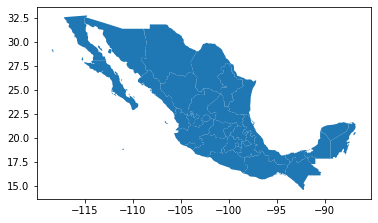

In [26]:
mexstates.plot();

In [32]:
mexstates.to_file('../data/estados_mexico.shp')